In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [106]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# axis 1 обозначает что мы удаляем колноки, а не строки
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [108]:
y = data['Survived']
data = data.drop(['Survived'], axis=1)
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [109]:
print(data.columns)
print(data.dtypes)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [110]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

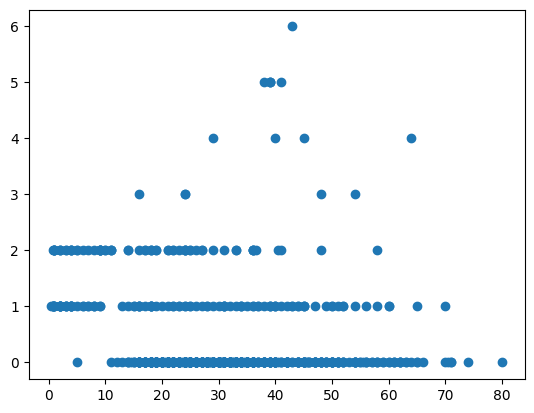

In [111]:
plt.scatter(data['Age'], data['Parch'])

In [112]:
data['Age'].mean(), data['Age'].median()

(29.69911764705882, 28.0)

In [113]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [114]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [115]:
data['Embarked'] = data['Embarked'].fillna('S')

In [116]:
data.Cabin.isna().sum(), len(data) # так как почти все поля(687 из 891) пропущенны, удаляем эту колонку

(687, 891)

In [117]:
data = data.drop(['Cabin'], axis=1)

In [118]:
# проверка на пустые данные
assert not data.isnull().values.any()

In [119]:
print(data.columns)
print(data.dtypes)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [120]:
data.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [121]:
# заменили все male на 1, а female на 0
data.Sex = data.Sex.astype('category') 
data.Sex = data.Sex.cat.codes


In [122]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,S
887,1,0,19.0,0,0,30.0000,S
888,3,0,28.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [123]:
# заменить классы так же не получится, так как это будет влиять (больше меньше), поэтому добавим еще столбцов
data = pd.get_dummies(data, columns=['Embarked'])
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,False,True
1,1,0,38.0,1,0,71.2833,True,False,False
2,3,0,26.0,0,0,7.9250,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,True
4,3,1,35.0,0,0,8.0500,False,False,True


In [124]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_y, val_y = train_test_split(data, y, test_size=0.3)